**Dependencies**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#Reading dataset
dataset = pd.read_csv('/dataset/winequality-red.csv', sep=';')

**Analysis** - Base Data

In [5]:
#Total number of entries within the Dataset
dataset.shape

(1599, 12)

In [6]:
#Finding all measurements of each attribute
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Analysis** - Correlation

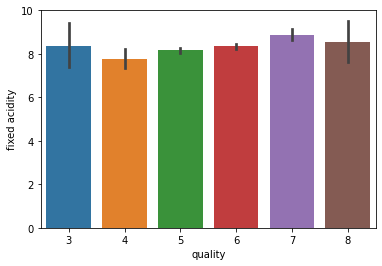

In [7]:
#How Fixed acidity affects quality
sns.barplot(x='quality', y='fixed acidity', data = dataset)

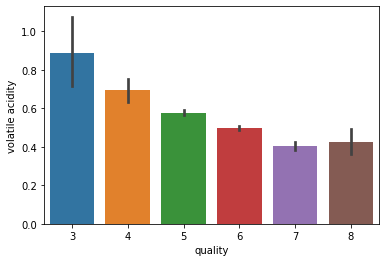

In [8]:
#How volatile acidity affects quality
sns.barplot(x='quality', y='volatile acidity', data = dataset)

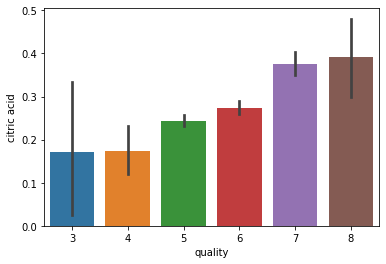

In [9]:
#How citric acidity affects quality
sns.barplot(x='quality', y='citric acid', data = dataset)

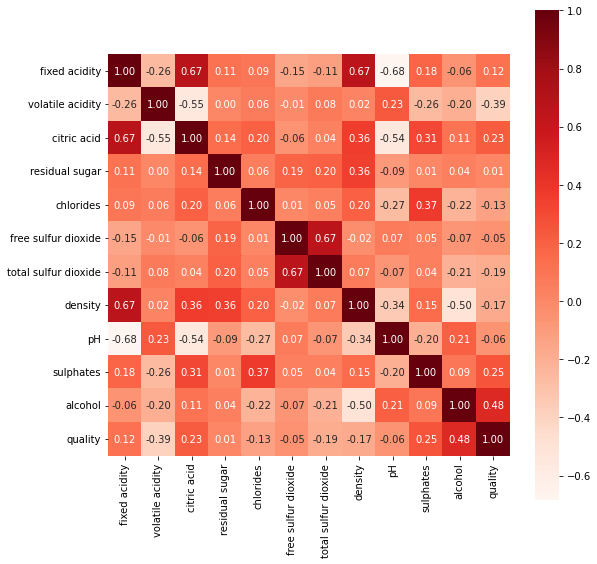

In [10]:
#Total correlation heatmap to show full-scale of correlation between each attribute
datasetCorrelation = dataset.corr()
plt.figure(figsize=(9,9))
sns.heatmap(datasetCorrelation, cbar=True, square=True, annot=True, fmt='.2f', cmap="Reds")

**Implementation 1**

In [25]:
#Seperating Quality from other attributes
attributes = dataset.drop('quality',axis=1)
quality = dataset['quality']

#Training and Testing Splits
attributes_train, attributes_test, quality_train, quality_test = train_test_split(attributes, quality, test_size=0.15, random_state=43)

#Model Training
model = RandomForestClassifier()
model.fit(attributes_train, quality_train)


RandomForestClassifier()

In [26]:
#Accuracy test
attributes_test_prediction = model.predict(attributes_test)
test_accuracy = accuracy_score(attributes_test_prediction, quality_test)
print('Accuracy: ', test_accuracy)

Accuracy:  0.725


**Prediction System with Input**

In [71]:
#Data Input - Edit this to make changes!
#In order: Fixed Acidity, volatile acidity, citric acidity, sugar, chlorides, FSO2, SO2, Density, pH, sulphates, alcohol
wine_data = (8.31,0.52,0.27,2.53,0.087,15.87,46.46,0.99,3.31,0.65,10.42)

wine_data = np.asarray(wine_data)
wine_data = wine_data.reshape(1, -1)

#Modify data to predict only 1 drink
prediction = model.predict(wine_data)
print(prediction)

[6]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


**Implementation 2**

In [49]:
wine_train, wine_test = train_test_split(dataset, test_size=0.15, random_state=43)

def train_and_pred(quality, attributes):
    reg = LinearRegression().fit(wine_train[attributes], wine_train[quality])
    quality_pred = reg.predict(wine_test[attributes])
    return quality_pred


prediction = train_and_pred('quality', attributes.columns)
wine_test['prediction'] = prediction
wine_test.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction
547,10.6,0.31,0.49,2.5,0.067,6.0,21.0,0.99870,3.26,0.86,10.7,6,6.196261
1197,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6,5.463080
500,7.8,0.52,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6,5.181661
631,10.4,0.28,0.54,2.7,0.105,5.0,19.0,0.99880,3.25,0.63,9.5,5,5.622290
1128,10.0,0.43,0.33,2.7,0.095,28.0,89.0,0.99840,3.22,0.68,10.0,5,5.600249
782,9.0,0.82,0.05,2.4,0.081,26.0,96.0,0.99814,3.36,0.53,10.0,5,4.990955
1121,6.6,0.50,0.00,1.8,0.062,21.0,28.0,0.99352,3.44,0.55,12.3,6,6.249671
426,6.4,0.67,0.08,2.1,0.045,19.0,48.0,0.99490,3.49,0.49,11.4,6,5.632425
832,10.4,0.44,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,5.697635
145,8.1,0.67,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5,4.842693


**Implementation 2 - Results**

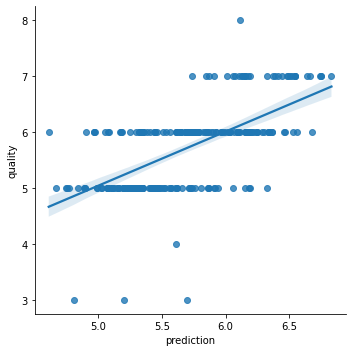

In [47]:
sns.lmplot(x='prediction', y='quality', data=wine_test)

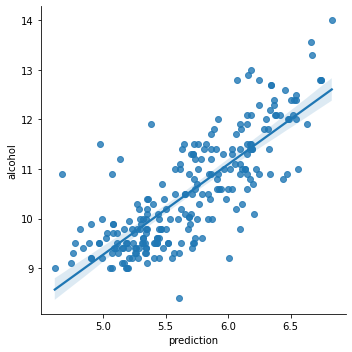

In [60]:
np.ceil(wine_test.prediction)
sns.lmplot(x='prediction', y='alcohol', data=wine_test)

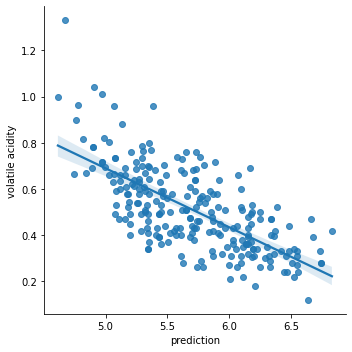

In [64]:
sns.lmplot(x='prediction', y='volatile acidity', data=wine_test)

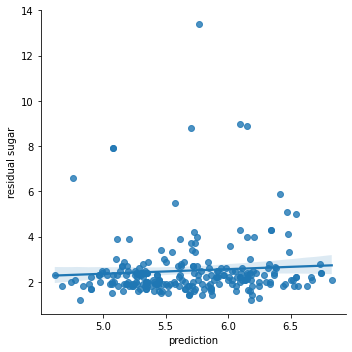

In [65]:
sns.lmplot(x='prediction', y='residual sugar', data=wine_test)

**Discussion**

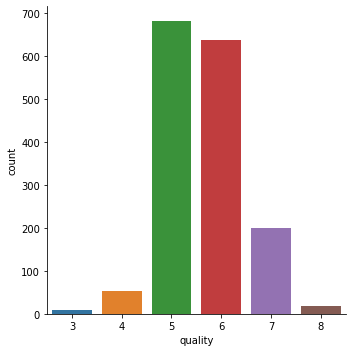

In [78]:
sns.catplot(x='quality', data = dataset, kind = 'count')